In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
## Loading in Data
spotify = pd.read_csv('Spotify Dataset.csv', index_col=0)

In [14]:
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Exploratory Data Analysis

In [15]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [16]:
missing_counts = spotify.isna().sum()

print(missing_counts)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [17]:
## Dropping Missing Values
spotify = spotify.dropna()


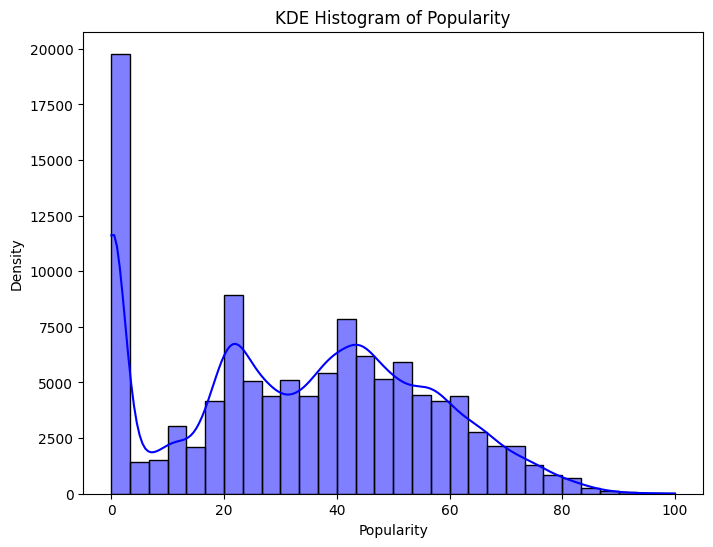

In [31]:
## Plotting a KDE histogram for popularity
plt.figure(figsize=(8, 6))
sns.histplot(spotify['popularity'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('KDE Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')

plt.show();


In [18]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


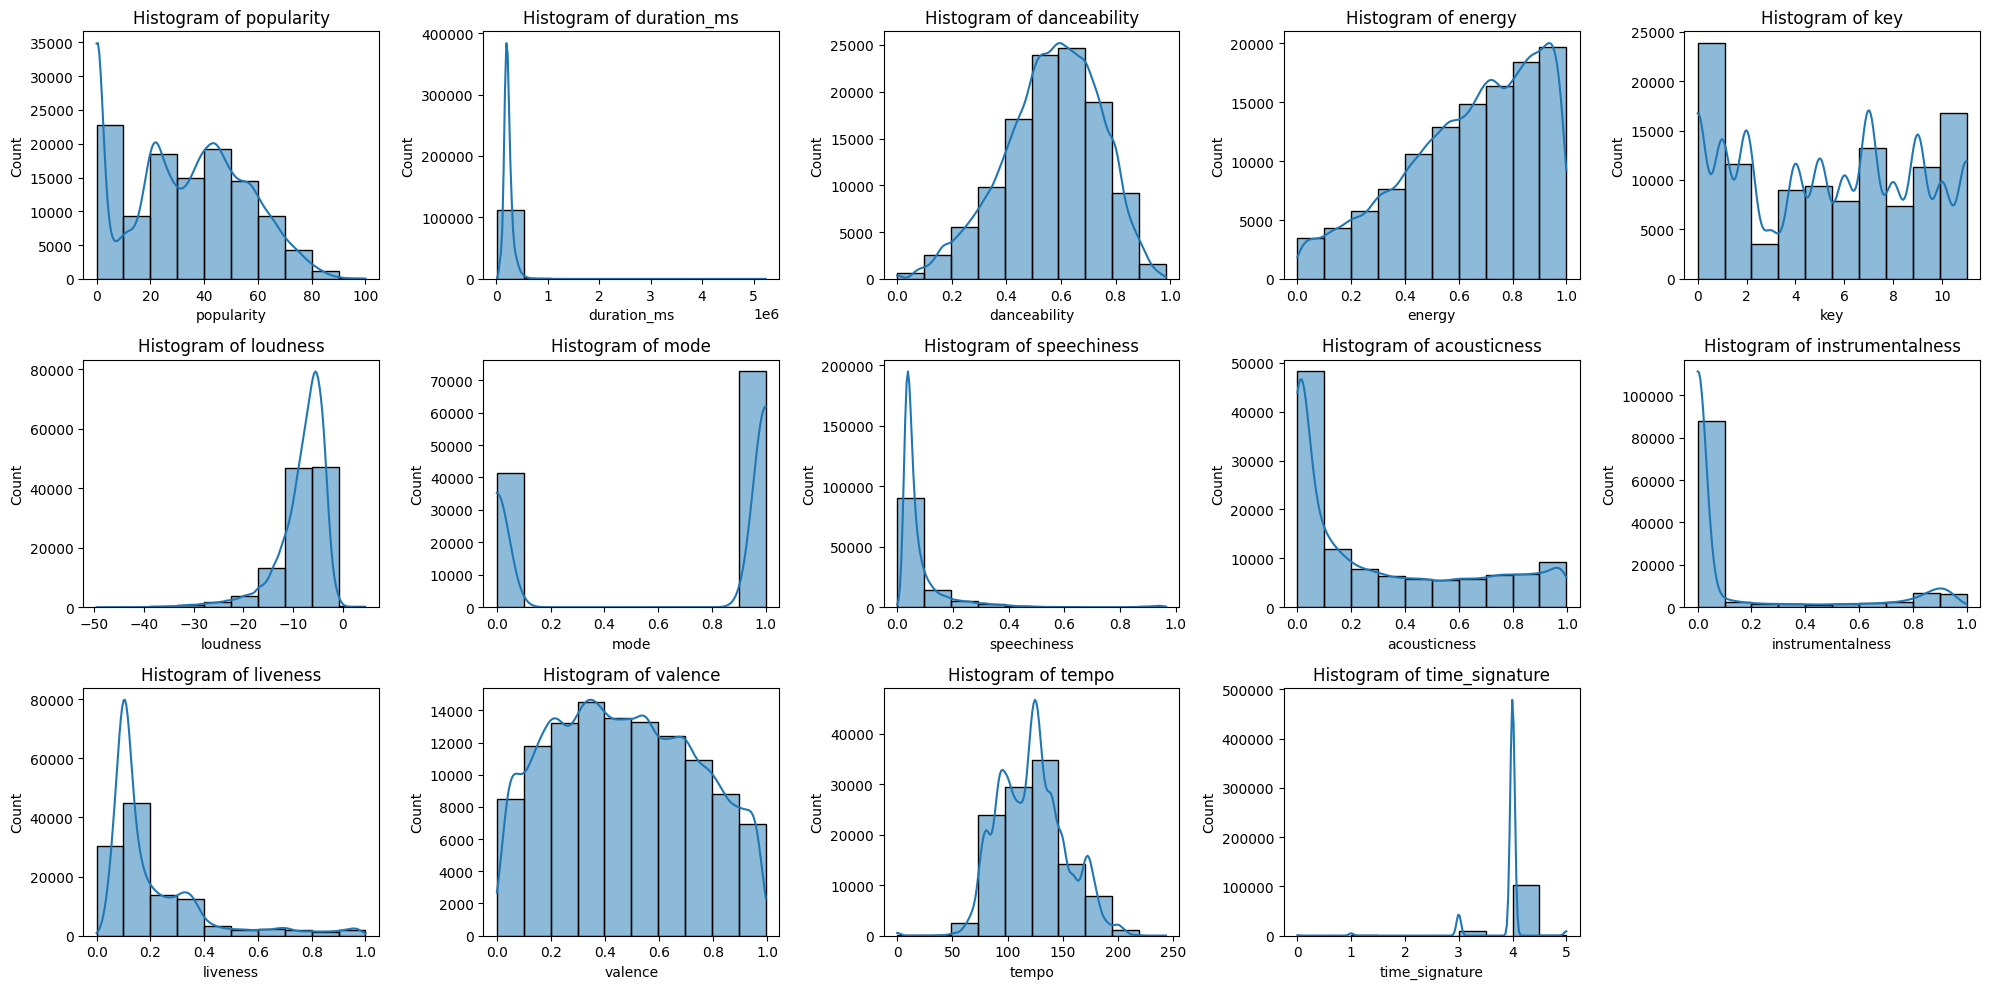

In [24]:
## Defining the number of rows and columns for subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()

## Looping through numeric columns and plotting
for i, col in enumerate(num_col):
    sns.histplot(spotify[col], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show();

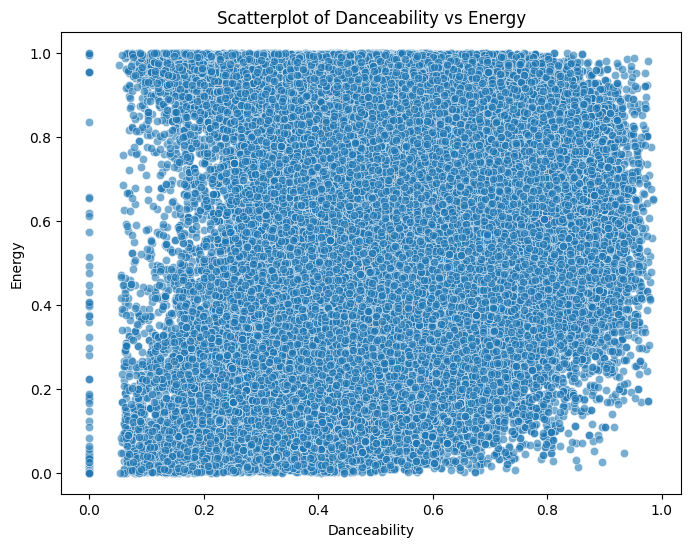

In [42]:
## Danceability vs. energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify['danceability'], y=spotify['energy'], alpha=0.6)
plt.title('Scatterplot of Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show();

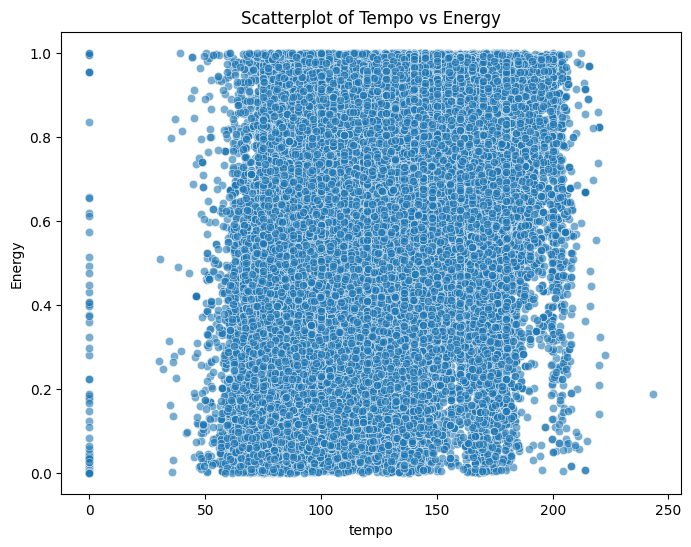

In [43]:
## tempo vs. energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify['tempo'], y=spotify['energy'], alpha=0.6)
plt.title('Scatterplot of Tempo vs Energy')
plt.xlabel('tempo')
plt.ylabel('Energy')
plt.show();

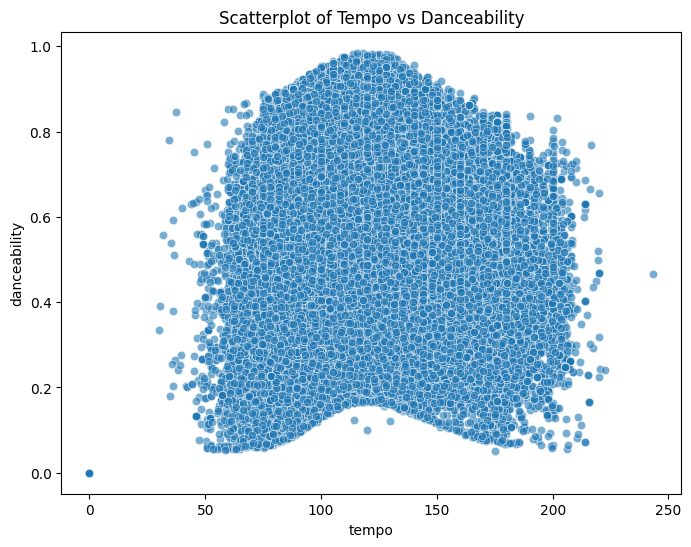

In [44]:
## tempo vs. danceability
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify['tempo'], y=spotify['danceability'], alpha=0.6)
plt.title('Scatterplot of Tempo vs Danceability')
plt.xlabel('tempo')
plt.ylabel('danceability')
plt.show();

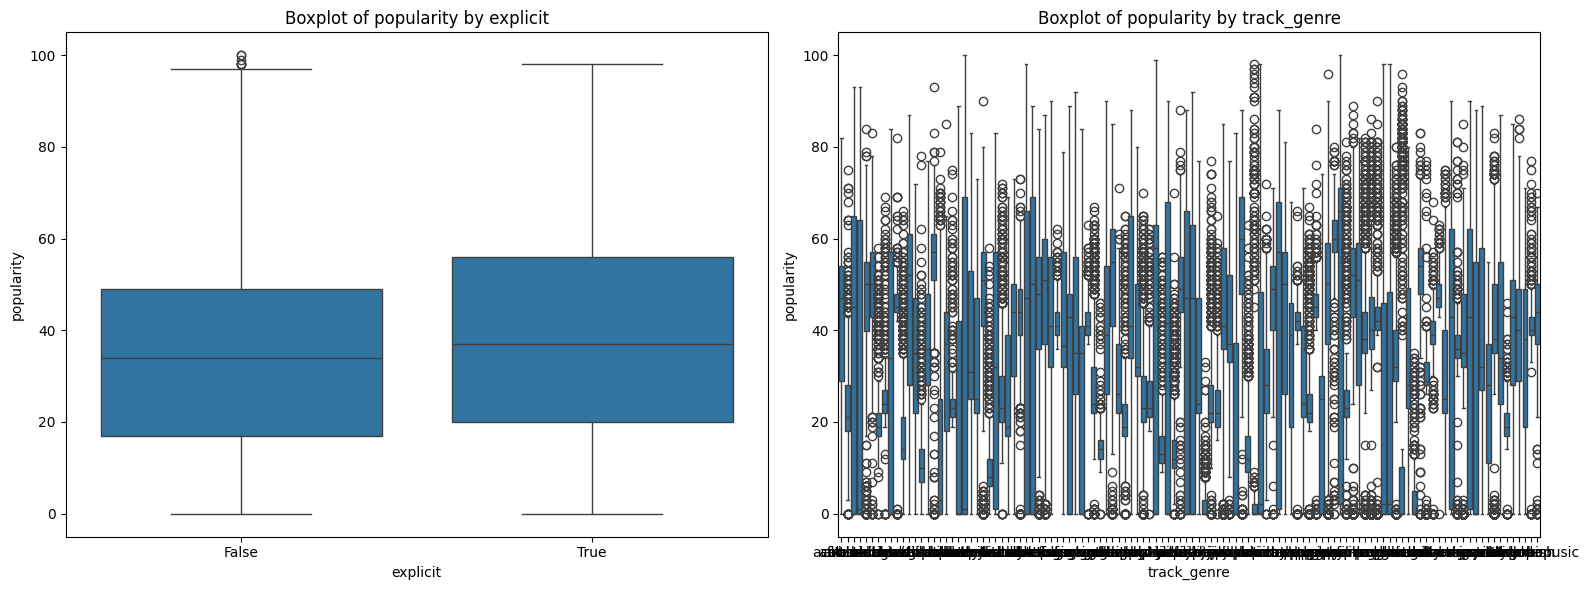

In [26]:
## Boxplots for categorical variables
cat_col = ['explicit', 'track_genre']
target = 'popularity'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

## Looping through categorical columns and create boxplots
for i, col in enumerate(cat_col):
    sns.boxplot(x=spotify[col], y=spotify[target], ax=axes[i])
    axes[i].set_title(f'Boxplot of {target} by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show();

<Axes: xlabel='explicit', ylabel='count'>

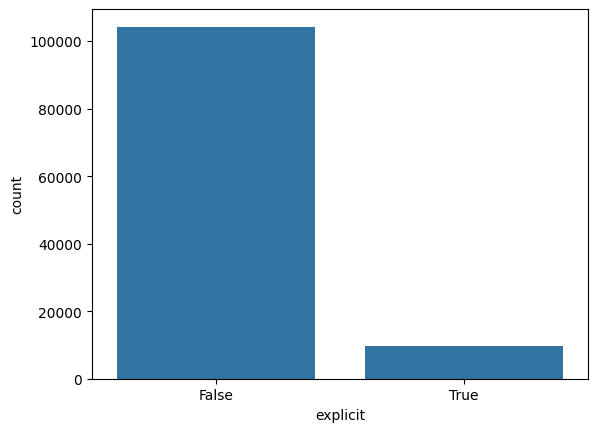

In [34]:
## Countplopt of explicit
sns.countplot(x=spotify['explicit'])

In [41]:
## Seeing top genres and their counts
top_genres = spotify['track_genre'].value_counts().reset_index()
top_genres.columns = ['track_genre', 'count']
top_genres = top_genres.sort_values(by='count', ascending=False)

top_genres



,track_genre,count
0,acoustic,1000
85,dubstep,1000
83,alt-rock,1000
82,alternative,1000
81,ambient,1000
...,...,...
34,techno,1000
33,trance,1000
32,trip-hop,1000
31,turkish,1000


In [28]:
## Seeing the total number of track genres
spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [30]:
## Seeing what artists pop up the most times
spotify.groupby('artists').size().sort_values(ascending=False).head(20)


,0
artists,
The Beatles,279
George Jones,271
Stevie Wonder,236
Linkin Park,224
Ella Fitzgerald,222
Prateek Kuhad,217
Feid,202
Chuck Berry,190
Håkan Hellström,183


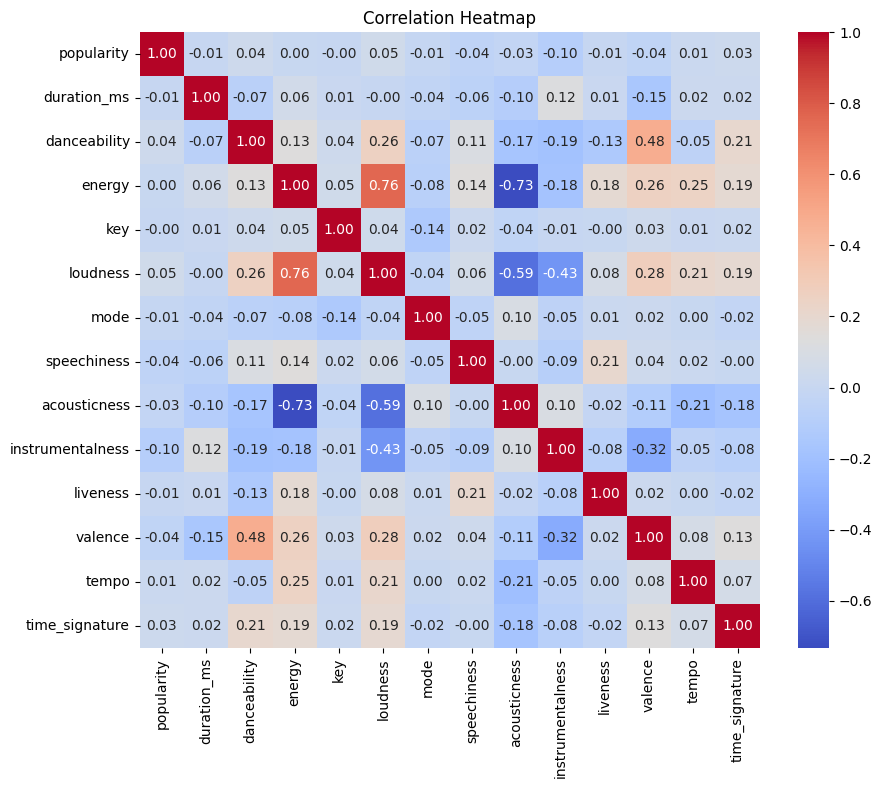

In [33]:
## Correlation matrix heatmap
correlation_matrix = spotify[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show();
